T.S.Varshini : VIT Chennai (20BRS1125) : varshini.ts2020@vitstudent.ac.in : 9003064047

Build an ANN model for Drug classification. 

This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to develop a model that can accurately predict the class or category of a given drug based on its features. 

Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification


In [1]:
# importing the required lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Task 1: Read the dataset and do data pre-processing

In [2]:
# Reading the csv file

df = pd.read_csv('AI_Assignment2_drug200.csv')

# Visualizing the 1st 5 observations

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
# Check the null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<AxesSubplot: >

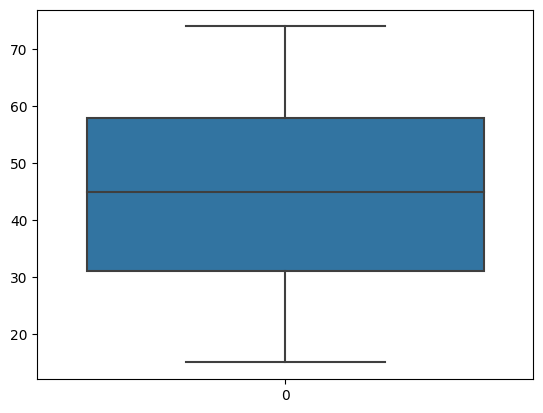

In [5]:
# Checking for outliers for column Age

sns.boxplot(df['Age'])

<AxesSubplot: >

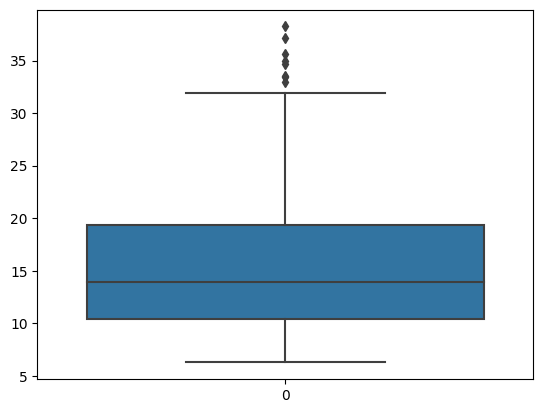

In [6]:
# Checking for outliers for cloumn Na_to_K

sns.boxplot(df['Na_to_K'])

In [7]:
# Replacement of outliers in column Na_to_K with median

q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
IQR = q3 - q1
print("q1: ",q1)
print("q3: ",q3)
print("IQR: ",IQR)

u_limit = q3+1.5*IQR
l_limit = q1-1.5*IQR

m = df['Na_to_K'].median()
print('Median: ',m)

#df['Na_to_K'] = np.where(df['Na_to_K']>u_limit,m-1,df['Na_to_K'])

q1:  10.4455
q3:  19.38
IQR:  8.9345
Median:  13.9365


In [8]:
df['Na_to_K'] = np.where(df['Na_to_K']>u_limit,u_limit-1,df['Na_to_K'])

<AxesSubplot: >

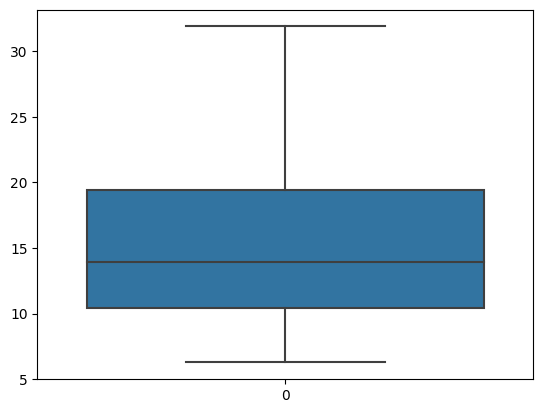

In [9]:
# Checking for outliers for cloumn Na_to_K

sns.boxplot(df['Na_to_K'])

In [10]:
# Finding unique category and value_counts of column Sex

print(df['Sex'].unique())
print(df['Sex'].value_counts())

# Finding unique category and value_counts of column BP

print(df['BP'].unique())
print(df['BP'].value_counts())

# Finding unique category and value_counts of column Cholesterol

print(df['Cholesterol'].unique())
print(df['Cholesterol'].value_counts())

# Finding unique category and value_counts of column Drug

print(df['Drug'].unique())
print(df['Drug'].value_counts())

['F' 'M']
M    104
F     96
Name: Sex, dtype: int64
['HIGH' 'LOW' 'NORMAL']
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
['HIGH' 'NORMAL']
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [12]:
# Label encoding columns of Sex, BP, Cholesterol
df_copy = df.copy(deep=True)
'''
df_copy['Sex'] = df_copy['Sex'].replace({'F':0,'M':1})
df_copy['BP'] = df_copy['BP'].replace({'HIGH':0,'LOW':1,'NORMAL':2})
df_copy['Cholesterol'] = df_copy['Cholesterol'].replace({'HIGH':0,'NORMAL':1})
'''
le = LabelEncoder()
df_copy['Sex'] = le.fit_transform(df_copy['Sex'])
df_copy['BP'] = le.fit_transform(df_copy['BP'])
df_copy['Cholesterol'] = le.fit_transform(df_copy['Cholesterol'])
df_copy['Drug'] = le.fit_transform(df_copy['Drug'])
df_copy

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [13]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [14]:
# Splitting the data
x = df_copy[['Age','Sex','BP','Cholesterol','Na_to_K']].values
#x = df_copy.iloc[:,0:5].values
x


array([[23.     ,  0.     ,  0.     ,  0.     , 25.355  ],
       [47.     ,  1.     ,  1.     ,  0.     , 13.093  ],
       [47.     ,  1.     ,  1.     ,  0.     , 10.114  ],
       [28.     ,  0.     ,  2.     ,  0.     ,  7.798  ],
       [61.     ,  0.     ,  1.     ,  0.     , 18.043  ],
       [22.     ,  0.     ,  2.     ,  0.     ,  8.607  ],
       [49.     ,  0.     ,  2.     ,  0.     , 16.275  ],
       [41.     ,  1.     ,  1.     ,  0.     , 11.037  ],
       [60.     ,  1.     ,  2.     ,  0.     , 15.171  ],
       [43.     ,  1.     ,  1.     ,  1.     , 19.368  ],
       [47.     ,  0.     ,  1.     ,  0.     , 11.767  ],
       [34.     ,  0.     ,  0.     ,  1.     , 19.199  ],
       [43.     ,  1.     ,  1.     ,  0.     , 15.376  ],
       [74.     ,  0.     ,  1.     ,  0.     , 20.942  ],
       [50.     ,  0.     ,  2.     ,  0.     , 12.703  ],
       [16.     ,  0.     ,  0.     ,  1.     , 15.516  ],
       [69.     ,  1.     ,  1.     ,  1.     , 11.455  

In [15]:
y = df_copy[['Drug']].values
#y = df_copy['Drug'].values
#y = df_copy.iloc[:,5:].values
y

array([[0],
       [3],
       [3],
       [4],
       [0],
       [4],
       [0],
       [3],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [4],
       [0],
       [4],
       [1],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [4],
       [0],
       [0],
       [4],
       [2],
       [4],
       [0],
       [4],
       [4],
       [1],
       [4],
       [4],
       [4],
       [0],
       [2],
       [0],
       [4],
       [4],
       [4],
       [1],
       [3],
       [0],
       [0],
       [0],
       [4],
       [0],
       [0],
       [2],
       [3],
       [2],
       [0],
       [4],
       [0],
       [0],
       [1],
       [0],
       [4],
       [2],
       [0],
       [1],
       [4],
       [0],
       [0],
       [2],
       [0],
       [4],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [4],
       [2],
       [4],
       [3],
    

In [16]:
### Sandardization of data ###
### We do not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler

In [17]:
# Initializing scalar
scaler = StandardScaler()

xScaled = scaler.fit_transform(x)

In [18]:
# Importing lib for train_test_split

from sklearn.model_selection import train_test_split

In [19]:
# Splitting the data into train and test

xtrain,xtest,ytrain,ytest = train_test_split(xScaled,y,test_size=0.2,random_state=21)

In [20]:
x.shape, y.shape

((200, 5), (200, 1))

In [21]:
xtrain.shape, ytrain.shape

((160, 5), (160, 1))

In [22]:
xtest.shape, ytest.shape

((40, 5), (40, 1))

Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

In [23]:
# Importing lib for ANN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense    

In [24]:
# Initialize model
model = Sequential()
# Input layer
model.add(Dense(18,input_dim=5,activation='relu'))
# Hidden layers
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
# Output layer
model.add(Dense(5,activation='softmax'))

In [25]:
# Compiling model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
# Model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                108       
                                                                 
 dense_1 (Dense)             (None, 32)                608       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
Total params: 5,073
Trainable params: 5,073
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Fitting model (training model)

model.fit(xtrain,ytrain,epochs=10,batch_size=5,validation_data=(xtest,ytest))

Epoch 1/10
32/32 [==============================] - 1s 6ms/step - loss: 1.4059 - accuracy: 0.4750 - val_loss: 1.2213 - val_accuracy: 0.6000
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 1.1046 - accuracy: 0.5625 - val_loss: 0.9992 - val_accuracy: 0.6750
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.8581 - accuracy: 0.6938 - val_loss: 0.8429 - val_accuracy: 0.6750
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.7063 - val_loss: 0.7212 - val_accuracy: 0.6750
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7937 - val_loss: 0.5798 - val_accuracy: 0.7000
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8687 - val_loss: 0.4821 - val_accuracy: 0.8000
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.9125 - val_loss: 0.3850 - val_accuracy: 0.8750
Epoch 8/10
32/32 [==

In [28]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 0s/step


In [29]:
test_lost, test_acc = model.evaluate(xtest, ytest)

2/2 [==============================] - 0s 10ms/step - loss: 0.2599 - accuracy: 0.9500


Task 3: Test the model with random data

In [30]:
random_data = np.array([[28.,0.,2.,0.,7.798]])  # Example random data
random_data_scaled = scaler.transform(random_data)
prediction = model.predict(random_data_scaled)
predicted_class_index = np.argmax(prediction)
predicted_class = le.inverse_transform([predicted_class_index])

print('Predicted class:', predicted_class[0])

1/1 [==============================] - 0s 12ms/step
Predicted class: drugX


In [31]:
random_data = np.array([[61.,  0.,  1.,  0., 18.043]])  # Example random data
random_data_scaled = scaler.transform(random_data)
prediction = model.predict(random_data_scaled)
predicted_class_index = np.argmax(prediction)
predicted_class = le.inverse_transform([predicted_class_index])

print('Predicted class:', predicted_class[0])

1/1 [==============================] - 0s 5ms/step
Predicted class: DrugY


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Using loss = categorical_crossentropy

In [32]:
# Splitting the data
x2 = df_copy[['Age','Sex','BP','Cholesterol','Na_to_K']].values
#x = df_copy.iloc[:,0:5].values
x2

array([[23.     ,  0.     ,  0.     ,  0.     , 25.355  ],
       [47.     ,  1.     ,  1.     ,  0.     , 13.093  ],
       [47.     ,  1.     ,  1.     ,  0.     , 10.114  ],
       [28.     ,  0.     ,  2.     ,  0.     ,  7.798  ],
       [61.     ,  0.     ,  1.     ,  0.     , 18.043  ],
       [22.     ,  0.     ,  2.     ,  0.     ,  8.607  ],
       [49.     ,  0.     ,  2.     ,  0.     , 16.275  ],
       [41.     ,  1.     ,  1.     ,  0.     , 11.037  ],
       [60.     ,  1.     ,  2.     ,  0.     , 15.171  ],
       [43.     ,  1.     ,  1.     ,  1.     , 19.368  ],
       [47.     ,  0.     ,  1.     ,  0.     , 11.767  ],
       [34.     ,  0.     ,  0.     ,  1.     , 19.199  ],
       [43.     ,  1.     ,  1.     ,  0.     , 15.376  ],
       [74.     ,  0.     ,  1.     ,  0.     , 20.942  ],
       [50.     ,  0.     ,  2.     ,  0.     , 12.703  ],
       [16.     ,  0.     ,  0.     ,  1.     , 15.516  ],
       [69.     ,  1.     ,  1.     ,  1.     , 11.455  

In [33]:
y2 = pd.get_dummies(df.iloc[:, 5:]).values
y2

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1,

In [34]:
# Initializing scalar
scaler = StandardScaler()

xScaled2 = scaler.fit_transform(x2)

In [35]:
# Splitting the data into train and test

xtrain2,xtest2,ytrain2,ytest2 = train_test_split(xScaled2,y2,test_size=0.2,random_state=21)

In [36]:
x2.shape, y2.shape

((200, 5), (200, 5))

In [37]:
xtrain2.shape, ytrain2.shape

((160, 5), (160, 5))

In [38]:
xtest2.shape, ytest2.shape

((40, 5), (40, 5))

In [39]:
# Initialize model
model2 = Sequential()
# Input layer
model2.add(Dense(18,input_dim=5,activation='relu'))
# Hidden layers
model2.add(Dense(32,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
# Output layer
model2.add(Dense(5,activation='softmax'))

In [40]:
# Compiling model

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 18)                108       
                                                                 
 dense_6 (Dense)             (None, 32)                608       
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 5)                 165       
                                                                 
Total params: 5,073
Trainable params: 5,073
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Fitting model (training model)

model2.fit(xtrain2,ytrain2,epochs=10,batch_size=5,validation_data=(xtest2,ytest2))

Epoch 1/10
32/32 [==============================] - 1s 6ms/step - loss: 1.3528 - accuracy: 0.5500 - val_loss: 1.2325 - val_accuracy: 0.6000
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 1.0242 - accuracy: 0.6250 - val_loss: 1.0094 - val_accuracy: 0.5750
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7657 - accuracy: 0.6625 - val_loss: 0.8238 - val_accuracy: 0.6250
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5798 - accuracy: 0.7812 - val_loss: 0.6800 - val_accuracy: 0.6500
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.8438 - val_loss: 0.5882 - val_accuracy: 0.7500
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8750 - val_loss: 0.5143 - val_accuracy: 0.7750
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2776 - accuracy: 0.9125 - val_loss: 0.5369 - val_accuracy: 0.7750
Epoch 8/10
32/32 [==

In [43]:
ypred2 = model.predict(xtest2)

2/2 [==============================] - 0s 16ms/step


In [44]:
test_lost2, test_acc2 = model2.evaluate(xtest2, ytest2)

2/2 [==============================] - 0s 13ms/step - loss: 0.2990 - accuracy: 0.8750


In [45]:
random_data = np.array([[28.,0.,2.,0.,7.798]])  # Example random data
random_data_scaled = scaler.transform(random_data)
prediction = model.predict(random_data_scaled)
predicted_class_index = np.argmax(prediction)
predicted_class = le.inverse_transform([predicted_class_index])

print('Predicted class:', predicted_class[0])

1/1 [==============================] - 0s 13ms/step
Predicted class: drugX


In [46]:
random_data = np.array([[61.,  0.,  1.,  0., 18.043]])  # Example random data
random_data_scaled = scaler.transform(random_data)
prediction = model.predict(random_data_scaled)
predicted_class_index = np.argmax(prediction)
predicted_class = le.inverse_transform([predicted_class_index])

print('Predicted class:', predicted_class[0])

1/1 [==============================] - 0s 13ms/step
Predicted class: DrugY
